# **Regresión Logística**

In [95]:
#Importación de las principales librerias

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [96]:
#Importación de la base de datos DATA1 donde están las variables de interés

data = pd.read_csv("../data/final/DATA1.csv", index_col=0)
"../data/graphs"

'../data/graphs'

In [97]:
#Verificar el tamaño de la base de datos: el numero de observaciones (18514) y el numero de variables (23)
data.shape

(18514, 23)

In [98]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18514 entries, 0 to 19371
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   año                18514 non-null  int64  
 1   conglome           18514 non-null  int64  
 2   vivienda           18514 non-null  int64  
 3   hogar              18514 non-null  int64  
 4   codperso           18514 non-null  int64  
 5   ubigeo_x           18514 non-null  int64  
 6   desercion_escolar  18514 non-null  int64  
 7   sexo               18514 non-null  int64  
 8   edad               18514 non-null  int64  
 9   area_geografica    18514 non-null  int64  
 10  lengua_materna     18514 non-null  int64  
 11  tipo_de_colegio    18514 non-null  int64  
 12  programa           18514 non-null  int64  
 13  situacion_laboral  18514 non-null  int64  
 14  vacunas_covid      18514 non-null  int64  
 15  educacion_padre    18514 non-null  int64  
 16  educacion_madre    18514 no

<Axes: xlabel='desercion_escolar', ylabel='edad'>

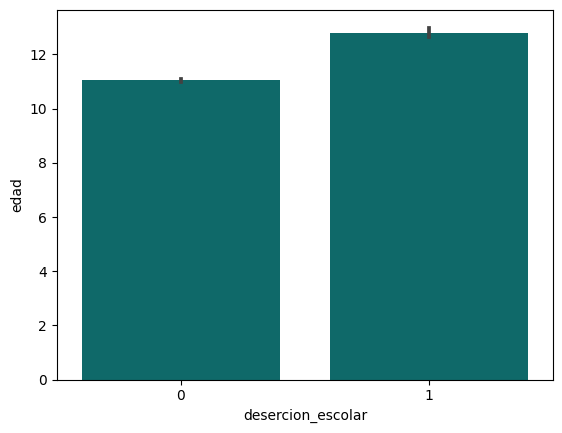

In [99]:
#Graficos de barra de la variable dependiente (deserción escolar) clasificandolo por Edad, vacunación contra el COVID,  educación de la madre y área geográfica
sns.barplot(x='desercion_escolar',y='edad',data=data,color='#007878',lw=4,ls='solid')

<Axes: xlabel='vacunas_covid', ylabel='desercion_escolar'>

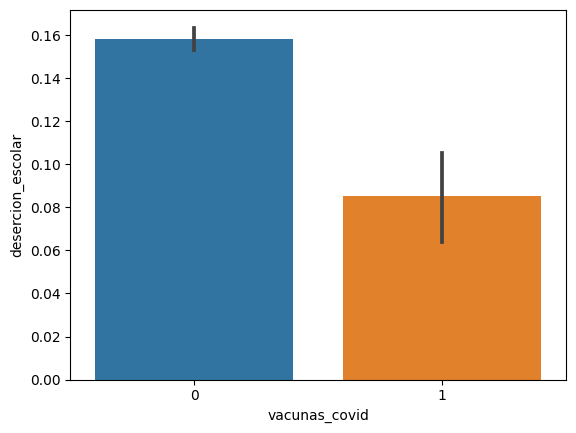

In [100]:
sns.barplot(data=data, x = 'vacunas_covid', y='desercion_escolar')

<Axes: xlabel='educacion_madre', ylabel='desercion_escolar'>

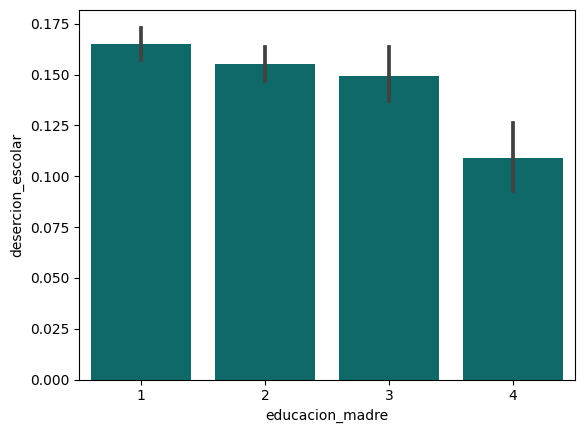

In [101]:
sns.barplot(data=data, x = 'educacion_madre', y='desercion_escolar',color='#007878',lw=4,ls='solid')

<Axes: xlabel='area_geografica', ylabel='desercion_escolar'>

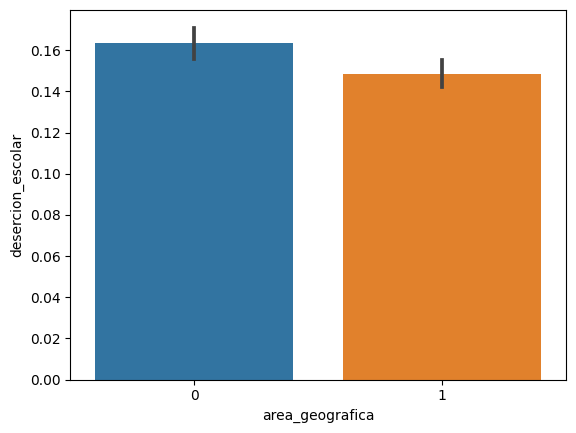

In [102]:
sns.barplot(data=data, x = 'area_geografica', y='desercion_escolar')

**Matriz de Correlación: Analisis de Multicolinealidad**

In [103]:
#Matriz de correlación de las variables independientes para el analisis de multicolinealidad
matriz_correlacion= data[['sexo', 'edad', 'area_geografica', 'lengua_materna', 'tipo_de_colegio',
       'programa', 'situacion_laboral', 'vacunas_covid', 'educacion_madre', 'educacion_padre', 
       'ingreso_familiar', 'tamaño_familiar', 'internet', 
       'tv', 'celular']].corr().round(2)
matriz_correlacion

,sexo,edad,area_geografica,lengua_materna,tipo_de_colegio,programa,situacion_laboral,vacunas_covid,educacion_madre,educacion_padre,ingreso_familiar,tamaño_familiar,internet,tv,celular
sexo,1.00,0.01,-0.00,0.01,-0.01,-0.01,0.06,-0.01,-0.01,0.00,0.01,-0.00,0.00,-0.00,-0.01
edad,0.01,1.00,-0.02,-0.08,-0.01,-0.02,0.47,0.21,-0.07,-0.06,0.04,-0.02,0.03,-0.01,0.04
area_geografica,-0.00,-0.02,1.00,0.34,-0.23,-0.19,-0.18,0.04,0.30,0.27,0.34,-0.12,0.38,0.23,0.19
lengua_materna,0.01,-0.08,0.34,1.00,-0.11,-0.08,-0.15,0.03,0.23,0.20,0.21,-0.12,0.23,0.19,0.24
tipo_de_colegio,-0.01,-0.01,-0.23,-0.11,1.00,0.50,0.06,-0.03,-0.18,-0.17,-0.34,0.06,-0.26,-0.16,-0.05
programa,-0.01,-0.02,-0.19,-0.08,0.50,1.00,0.01,-0.03,-0.14,-0.14,-0.21,0.05,-0.16,-0.11,-0.03
situacion_laboral,0.06,0.47,-0.18,-0.15,0.06,0.01,1.00,0.08,-0.12,-0.10,-0.04,0.01,-0.08,-0.06,0.01
vacunas_covid,-0.01,0.21,0.04,0.03,-0.03,-0.03,0.08,1.00,0.02,0.01,0.07,-0.03,0.06,0.03,0.03
educacion_madre,-0.01,-0.07,0.30,0.23,-0.18,-0.14,-0.12,0.02,1.00,0.63,0.26,-0.10,0.22,0.19,0.06
educacion_padre,0.00,-0.06,0.27,0.20,-0.17,-0.14,-0.10,0.01,0.63,1.00,0.24,-0.11,0.20,0.14,0.07


Hay una fuerte correlación entre la variable años de educación de la Madre y años de educación del Padre. Con el fin de evitar complicaciones relacionadas con la multicolinealidad, decidimos excluir la variable de **educación del padre**. 

<Axes: >

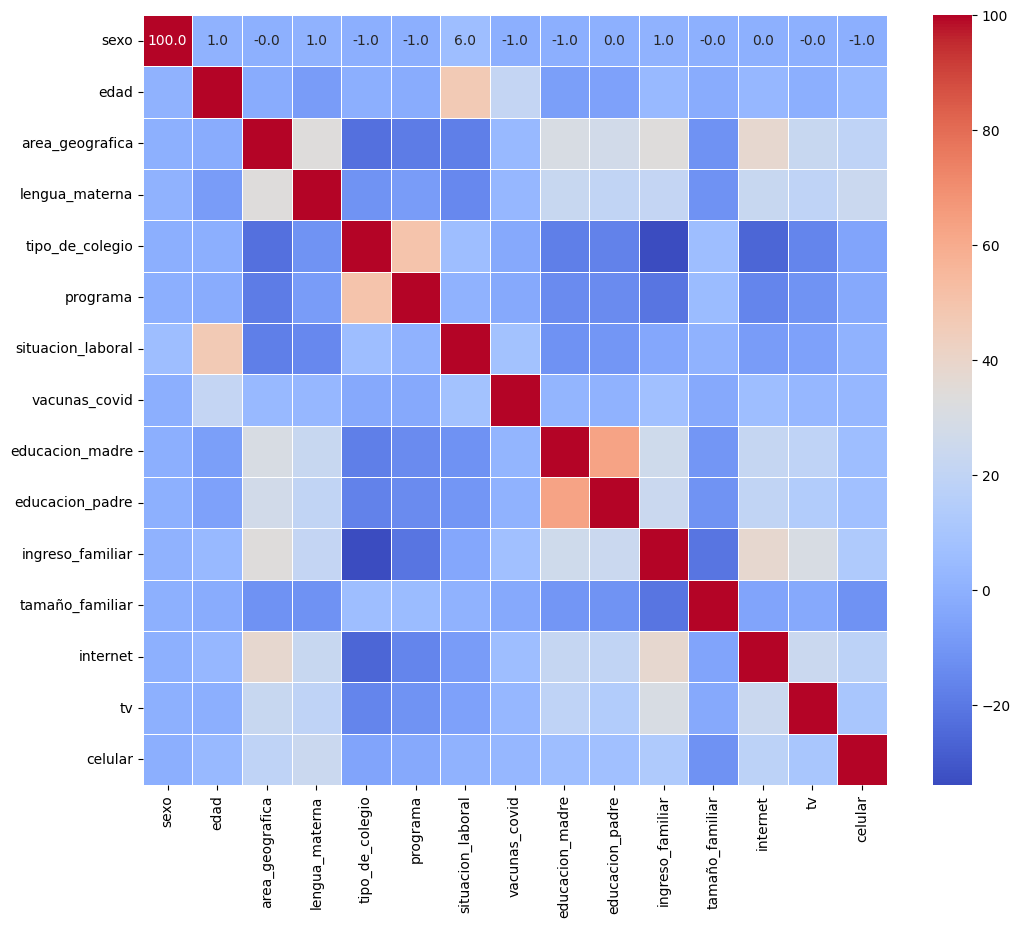

In [104]:
plt.figure(figsize=(12, 10))

# Configura el tamaño de los espacios para los valores
annot_kws = {"size": 10}

# Crea un mapa de calor con porcentajes y ajusta el tamaño de los espacios para los valores
sns.heatmap(matriz_correlacion * 100, annot=True, cmap="coolwarm", fmt=".1f", linewidths=.5, annot_kws=annot_kws)


In [105]:
#Creación de la matriz "X" con las variables independientes y de la matriz "y" con la variable independiente. Se añade un vector de constantes a la matriz X
X = data[['sexo', 'edad' ,'area_geografica', 'lengua_materna', 'tipo_de_colegio',
       'programa', 'situacion_laboral', 'vacunas_covid', 'educacion_madre',
       'ingreso_familiar', 'tamaño_familiar', 'internet', 
       'tv', 'celular']] # Variable independiente
y = data['desercion_escolar'] # Variable dependiente
X = sm.add_constant(X)

In [106]:
#Ajuste del modelo de regresión logística a datos representados por las variables independientes (X) y la variable dependiente (y). Se utiliza el método 'HC3' para corregir la heterocedasticidad en la estimación de la covarianza de los coeficientes del modelo.
logit_model = sm.Logit(y, X)
result = logit_model.fit(cov_type='HC3')

         Current function value: 0.374981
         Iterations: 35


c:\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
#presentación de la tabla de resultados del modelo de regresión logística
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:      desercion_escolar   No. Observations:                18514
Model:                          Logit   Df Residuals:                    18499
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.1313
Time:                        18:53:20   Log-Likelihood:                -6942.4
converged:                      False   LL-Null:                       -7992.1
Covariance Type:                  HC3   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -16.2198      0.185    -87.526      0.000     -16.583     -15.857
sexo                 -0.0074      0.043     -0.170      0.865      -0.092       0.078
edad                  0.

In [108]:
#Presentar los efectos marginales del modelo de regresión logístico. Se calculan mediante el valor medio de las variables independientes (at mean).
margins = result.get_margeff(at='mean', method='dydx')
print(margins.summary())

        Logit Marginal Effects       
Dep. Variable:      desercion_escolar
Method:                          dydx
At:                              mean
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sexo                 -0.0003      0.002     -0.170      0.865      -0.004       0.003
edad                  0.0040      0.000     13.104      0.000       0.003       0.005
area_geografica       0.0061      0.002      2.736      0.006       0.002       0.011
lengua_materna        0.0010      0.003      0.326      0.745      -0.005       0.007
tipo_de_colegio       0.6655      0.014     48.633      0.000       0.639       0.692
programa             -0.0603      0.002    -28.597      0.000      -0.064      -0.056
situacion_laboral     0.0285      0.003      9.980      0.000       0.023       0.034
vacunas_covid        -0.0597      0.006     -9.449      0.000      -0.072 

In [109]:
#Valores predichos de las variables independientes
predictions = result.predict(X)

In [110]:
#Evaluación de las predicciones del modelo de regresión con un umbral (threshold) de 0.5. Se clasifican las predicciones comparando con el umbral y, de acuerdo a ello,se calculan métricas de evaluación mediante la Matriz de Confusión.
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y, predicted_classes)
conf_matrix = confusion_matrix(y, predicted_classes)
report = classification_report(y, predicted_classes)

print(f'Precisión del modelo: {accuracy}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(report)


Precisión del modelo: 0.8543804688343956
Matriz de Confusión:
[[15469   171]
 [ 2525   349]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     15640
           1       0.67      0.12      0.21      2874

    accuracy                           0.85     18514
   macro avg       0.77      0.56      0.56     18514
weighted avg       0.83      0.85      0.81     18514

